### 농구선수의 게임 데이터를 활용한 포지션 예측을 위한 데이터 정제
: NBA농구 선수들의 게임기록을 데이터로 사용하여 특정 농구 선수의 포지션을 예측

In [19]:
import pandas as pd

In [20]:
df = pd.read_csv("../Data/basketball.csv")
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [21]:
df.tail()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1
99,Lou Williams,SG,2.0,3.3,2.5,3.0,1.0,0.2


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   Pos     100 non-null    object 
 2   3P      100 non-null    float64
 3   2P      100 non-null    float64
 4   TRB     100 non-null    float64
 5   AST     100 non-null    float64
 6   STL     100 non-null    float64
 7   BLK     100 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.4+ KB


### Column Description
- Player : 선수 이름
- Pos : 포지션(SG:Shooting Guard, C:Center)
- 3P : 한 경기당 평균 3점슛 성공 횟수
- 2P : 한 경기당 평균 2점슛 성공 횟수 
- TRB : 한 경기당 평균 리바운드 성공 횟수 
- AST : 한 경기당 평균 어시스트 성공 횟수 
- STL : 한 경기당 평균 스틸 성공 횟수 
- BLK : 한 경기당 평균 블로킹 성공 횟수

In [23]:
# 포지션 종류 파악
df.Pos.unique()

array(['SG', 'C'], dtype=object)

In [24]:
# 포지션별 갯수 파악
df.Pos.value_counts()

Pos
SG    50
C     50
Name: count, dtype: int64

#### 포지션별 내용
- C : Center는 골대, 포스트 근처에서 슛을 블로킹하고, 리바운드 하며 바깥으로 쳐내며, 골대 근처에서 2점슛으로 득점을 하기도 한다. 
- SG : Shooting Guard는 코트내에서 3점슛등 장거리슛을 해서 점수를 얻는 역할  

---
### 데이터 시각화를 통한 EDA(탐색적 데이터 분석) 실시 
: 데이터의 특징을 바탕으로 한 공간에 시각화 함으로써 머신러닝 학습에 필요한 컬럼과 불필요한 컬럼의 특징을 파악

In [25]:
# 시각화에 한글을 보이게
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

### 스틸, 2점슛 데이터 시각화

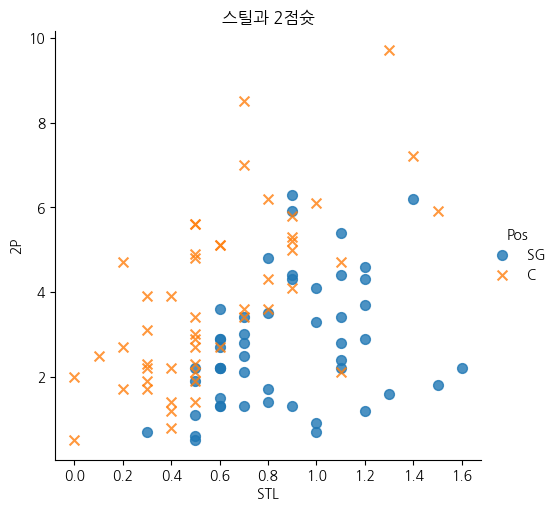

In [27]:
sns.lmplot(
    x='STL',
    y='2P',
    data=df,
    fit_reg = False,
    scatter_kws={'s':50}, # 좌표상의 점 크기 
    hue='Pos',
    markers=['o','x']
)

plt.title('스틸과 2점슛')
plt.show()

> 스틸과 2점슛의 속성으로 데이터를 분포시킬 경우 슈팅가드와 센터의 경계가 너무 근접해서 분류하기에 모호하다.

### 어시스트와 2점슛 데이터 시각화

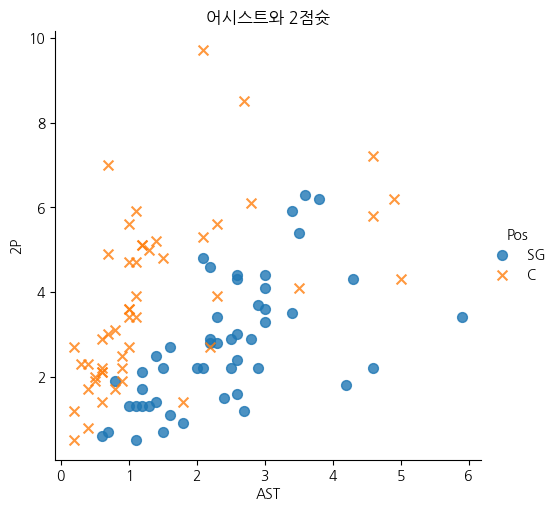

In [28]:
sns.lmplot(
    x='AST',
    y='2P',
    data=df,
    fit_reg = False,
    scatter_kws={'s':50}, # 좌표상의 점 크기 
    hue='Pos',
    markers=['o','x']
)

plt.title('어시스트와 2점슛')
plt.show()

> 어시스트와 2점슛의 속성으로 데이터를 분포시킬 경우 슈팅가드와 센터의 경계가 너무 근접해서 분류하기에 모호하다.

### 블로킹과 3점슛 데이터 시각화

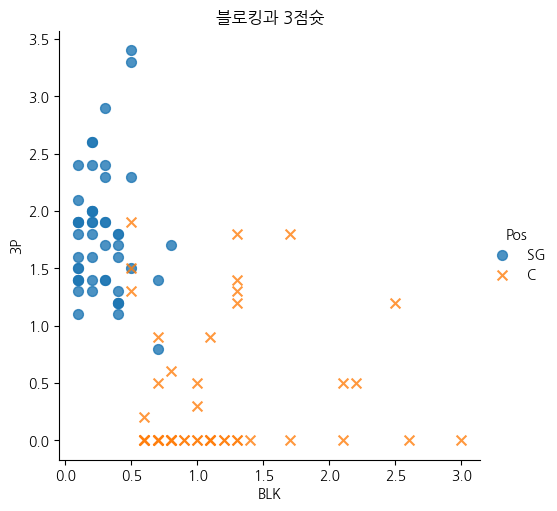

In [29]:
sns.lmplot(
    x='BLK',
    y='3P',
    data=df,
    fit_reg = False,
    scatter_kws={'s':50}, # 좌표상의 점 크기 
    hue='Pos',
    markers=['o','x']
)

plt.title('블로킹과 3점슛')
plt.show()

### 리바운드와 3점슛

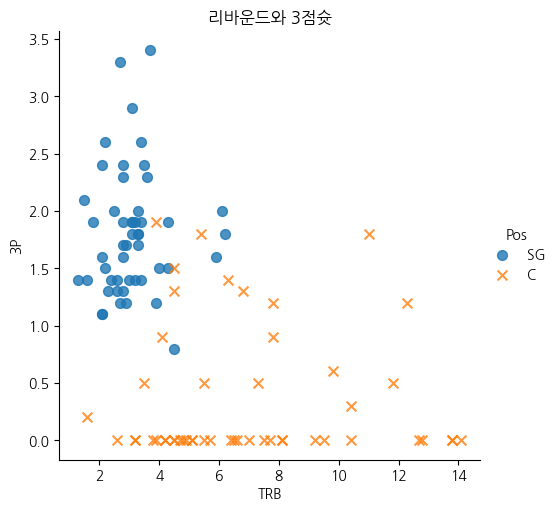

In [30]:
sns.lmplot(
    x='TRB',
    y='3P',
    data=df,
    fit_reg = False,
    scatter_kws={'s':50}, # 좌표상의 점 크기 
    hue='Pos',
    markers=['o','x']
)

plt.title('리바운드와 3점슛')
plt.show()

> EDA(Explorer Data Analysis:탐색적 데이터 분석) 결과     
분별력이 ㅇ벗는 feature를 데이터에서 제거하기 위해 시각화를 해본 결과     
2P, AST, STL은 분별력이 없는 것으로 판단됨

In [31]:
# 분별력이 없는 Feature를 데이터에서 제거
df.drop(
    ['2P', 'AST', 'STL'],
    axis='columns',
    inplace=True
)

df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [32]:
# 학습데이터와 검증데이터로 나누기
from sklearn.model_selection import train_test_split

In [33]:
train, test = train_test_split(
                    df,
                    test_size=0.2,  # 데이터가 100개로 많이 없어서 테스트를 20%만 잡음 / 보통 30%
                    random_state=42,
                    stratify=df.Pos
)

In [34]:
# 확인
print(train.shape)
print(test.shape)

(80, 5)
(20, 5)


In [35]:
train.head()

,Player,Pos,3P,TRB,BLK
31,Pau Gasol,C,0.9,7.8,1.1
5,Nicolas Batum,SG,1.8,6.2,0.4
19,Allen Crabbe,SG,1.7,2.9,0.3
32,Manu Ginobili,SG,1.3,2.3,0.2
36,Danny Green,SG,1.7,3.3,0.8


In [36]:
# 데이터 저장하기
train.to_csv("../Data/basketball_train.csv", index=None)
test.to_csv("../Data/basketball_test.csv", index=None)